<a href="https://colab.research.google.com/github/PepiMartin28/EDA_Spotify_Music/blob/main/EDA_Spotify_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##In this project we are going to analyze a csv file that contains information about differents songs of Spotify, the file has the followings columns:

* artists:	The name(s) of the artist(s) associated with the track. (String)
* album_name:	The name of the album that the track belongs to. (String)
* track_name:	The name of the track. (String)
* popularity:	The popularity score of the track on Spotify, ranging from 0 to 100. (Integer)
* duration_ms	The duration of the track in milliseconds. (Integer)
* explicit:	A boolean value indicating whether the track contains explicit content. (Boolean)
* danceability:	A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements. (Float)
* energy:	A measure of the intensity and activity of a track, ranging from 0 to 1. (Float)
* key:	The key of the track represented by an integer value. (Integer)
* loudness:	The loudness of the track in decibels (dB). (Float)
* mode:	The tonal mode of the track, represented by an integer value (0 for minor, 1 for major). (Integer)
* speechiness:	A score ranging from 0 to 1 that represents the presence of spoken words in a track. (Float)
* acousticness:	A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality. (Float)
* instrumentalness:	A score ranging from 0 to 1 that represents the likelihood of a track being instrumental. (Float)
* liveness	A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance of a track. (Float)
* valence	A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track. (Float)
* tempo:	The tempo of the track in beats per minute (BPM). (Float)
* time_signature:	The number of beats within each bar of the track. (Integer)
* track_genre:	The genre of the track. (String)


###We'll use Pandas to work with csv file as a dataframe and we'll use Matplotlib and Seaborn to make some graphs.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Proyectos/EDA Music/spotify_music.csv')

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

##Data Clean

First we drop de column 'Unnamed: 0' and then we drop the row with a null value in the 'track_name' or 'album_name'.

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.drop(index=df[(df['album_name'].isna())|(df['track_name'].isna())].index, inplace=True)

Then we check that all values are valid

In [19]:
df['danceability'].between(0,1).sum()

113999

All values of the column 'danceability' are valid.

In [20]:
df['popularity'].between(0,100).sum()

113999

All values of the column 'popularity' are valid.

In [21]:
df['energy'].between(0,1).sum()

113999

All values of the column 'energy' are valid.

In [23]:
df['mode'].between(0,1).sum()

113999

All values of the column 'mode' are valid.

In [24]:
df['speechiness'].between(0,1).sum()

113999

All values of the column 'speechiness' are valid.

In [25]:
df['acousticness'].between(0,1).sum()

113999

All values of the column 'acousticness' are valid.

In [26]:
df['instrumentalness'].between(0,1).sum()

113999

All values of the column 'instrumentalness' are valid.

In [29]:
df['liveness'].between(0,1).sum()

113999

All values of the column 'liveness' are valid.

In [30]:
df['valence'].between(0,1).sum()

113999

All values of the column 'valence' are valid.

Since all values are valid, we continue with the analysis.

##Data Analysis

In [6]:
df_copy = df.copy()

In [69]:
df_copy['artists'] = df_copy['artists'].str.split(';')

df_exploded = df_copy.explode('artists')

top_10_artists_songs = df_exploded.groupby('artists').size().sort_values(ascending=False).head(10).reset_index(name='songs_counts')

<ipython-input-70-abc6c336335e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


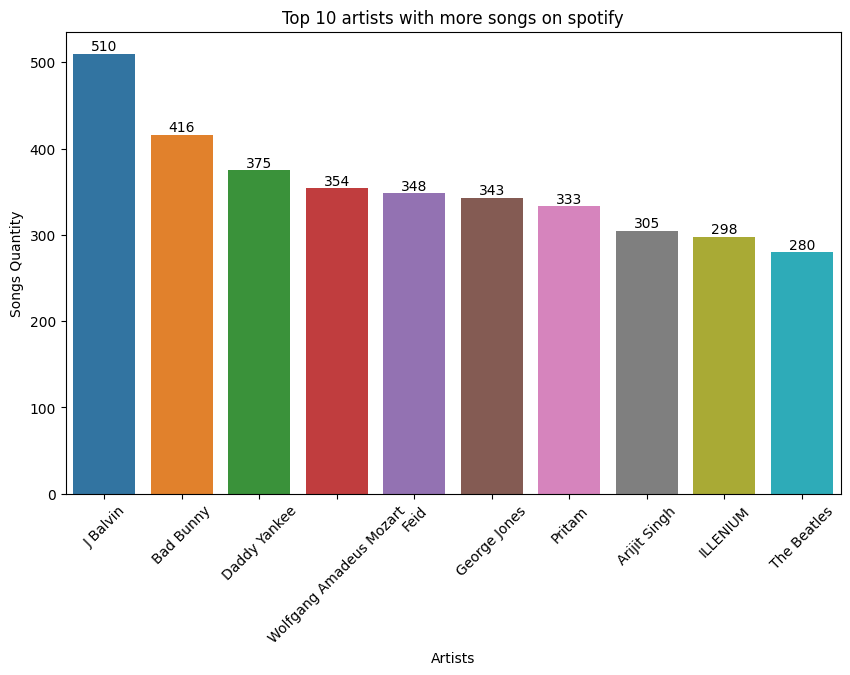

In [70]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10_artists_songs, x='artists', y='songs_counts', hue='artists')

ax.set_title('Top 10 artists with more songs on spotify')
ax.set_xlabel('Artists')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Songs Quantity')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

In [77]:
artists_popularity = df_exploded.groupby('artists').agg(songs_counts=('artists','size'), avg_popularity=('popularity','mean'))

top_10_artists_popular = artists_popularity[artists_popularity['songs_counts']>10]['avg_popularity'].sort_values(ascending=False).head(10).reset_index(name='popularity')

<ipython-input-90-65612e0f357f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


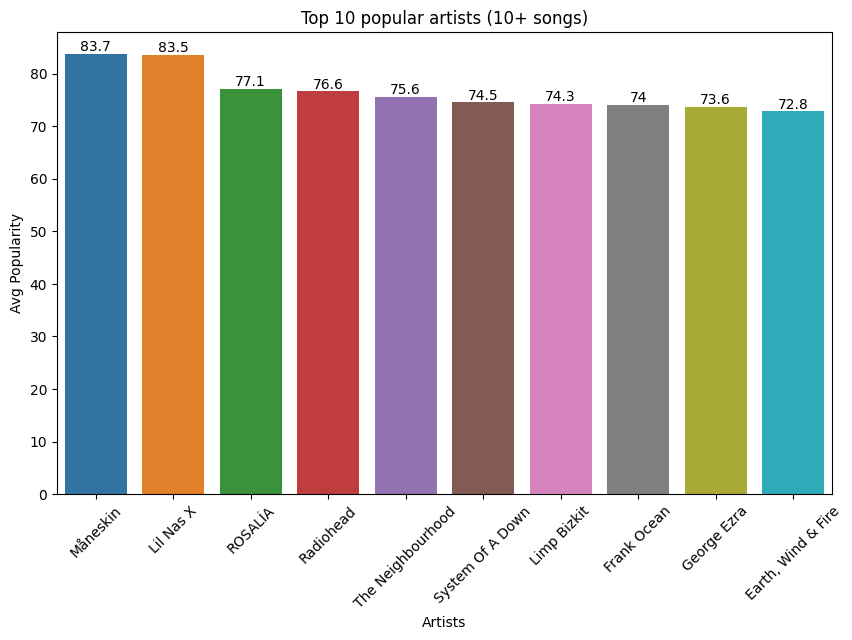

In [90]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=top_10_artists_popular.round(1), x='artists', y='popularity', hue='artists')

ax.set_title('Top 10 popular artists (10+ songs)')
ax.set_xlabel('Artists')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Avg Popularity')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

In [86]:
genres_popularity = df_copy.groupby('track_genre')['popularity'].mean()

top_10_genres_popular = genres_popularity.sort_values(ascending=False).head(10).reset_index(name='popularity')

<ipython-input-89-c0e1ca4ebe71>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


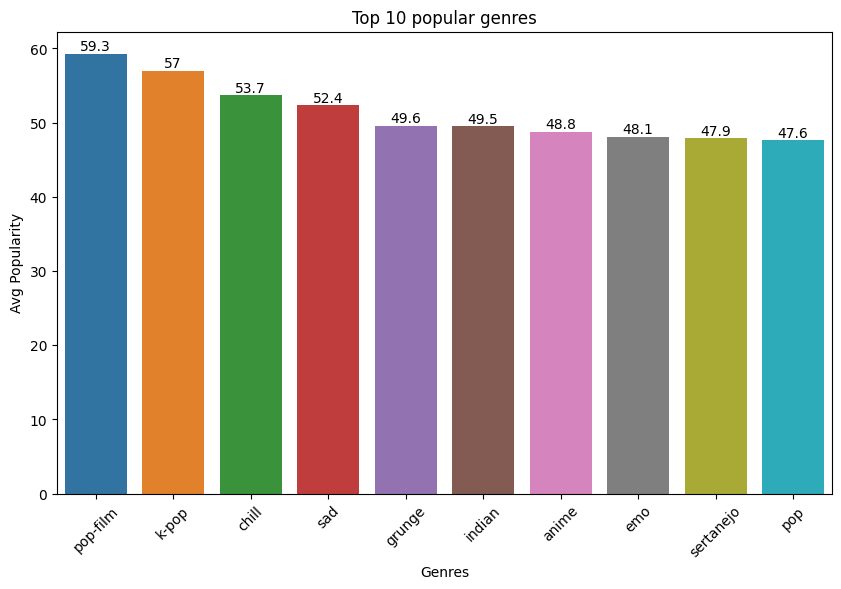

In [89]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=top_10_genres_popular.round(1), x='track_genre', y='popularity', hue='track_genre')

ax.set_title('Top 10 popular genres')
ax.set_xlabel('Genres')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Avg Popularity')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

In [106]:
albums_popularity = df_copy.groupby('album_name').agg(songs_count=('album_name','size'), avg_popularity=('popularity','mean'))

top_10_albums_popular = albums_popularity[albums_popularity['songs_count'] > 5]

top_10_albums_popular = top_10_albums_popular['avg_popularity'].sort_values(ascending=False).head(10).reset_index(name='popularity')

<ipython-input-108-ca0386cddea7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


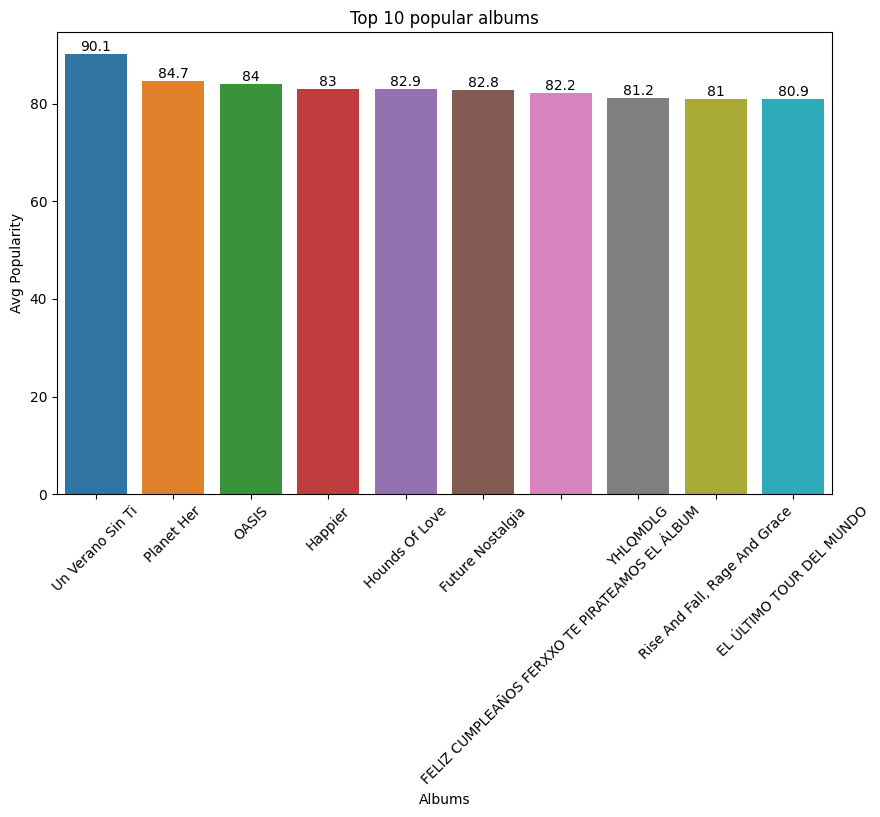

In [108]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=top_10_albums_popular.round(1), x='album_name', y='popularity', hue='album_name')

ax.set_title('Top 10 popular albums')
ax.set_xlabel('Albums')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Avg Popularity')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

In [7]:
df_copy['tempo_category'] = pd.cut(df['tempo'],
                                   bins=[0, 60, 120, 180, np.inf],
                                   labels=['Slow', 'Moderate', 'Fast', 'Very Fast'])

In [16]:
ct_tempo_explicit = pd.crosstab(index=df_copy['tempo_category'],
                                columns=df_copy['explicit'],
                                rownames=['Tempo Category'],
                                colnames=['Is Explicit?'],
                                margins=True)

ct_tempo_explicit

Is Explicit?,False,True,All
Tempo Category,,,
Slow,325,36,361
Moderate,47912,4907,52819
Fast,52662,4489,57151
Very Fast,3196,315,3511
All,104095,9747,113842


In [15]:
pt_tempo = pd.pivot_table(data=df_copy,
                          index='tempo_category',
                          values=['speechiness', 'acousticness', 'instrumentalness', 'liveness', 'danceability', 'popularity', 'tempo'],
                          aggfunc='mean')

pt_tempo

,acousticness,danceability,instrumentalness,liveness,popularity,speechiness,tempo
tempo_category,,,,,,,
Slow,0.694439,0.336010,0.427762,0.272861,28.027701,0.154927,53.415050
Moderate,0.382116,0.572959,0.147657,0.212196,33.102198,0.086150,97.172785
Fast,0.254040,0.571607,0.163290,0.214602,33.518014,0.080827,141.819707
Very Fast,0.247434,0.444997,0.114444,0.200036,31.108516,0.120954,190.180815
